# Analise de Sentimento

Analise de sentimento para as resenhas de filmes do imdb em pt br. A base de dados original pode ser encontrada em 
https://www.kaggle.com/luisfredgs/imdb-ptbr

## Leitura de Dados

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('rslp')

from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gstankev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\gstankev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


In [2]:
imdb = pd.read_csv('imdb-reviews-pt-br.csv')

In [3]:
imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [14]:
imdb['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [15]:
imdb['classe'] = imdb['sentiment'].replace(["neg","pos"],[0,1])

In [16]:
imdb.head()

,id,text_en,text_pt,sentiment,classe
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Bag of Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
#texto = ['Assisti um filme otimo','Assisti um filme ruim']
vetorizar = CountVectorizer(max_features=50) # lowercase=False
bag_of_words = vetorizar.fit_transform(imdb['text_pt'])

In [33]:
bag_of_words.shape

(49459, 50)

In [43]:
matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [44]:
matrix

,ao,apenas,as,bem,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,1,0,0,1,2,1,0,4,4,2,...,2,1,0,0,0,1,0,3,2,0
1,0,0,0,2,2,0,0,7,1,3,...,1,0,0,2,0,1,0,5,2,1
2,0,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,0,1,4,1,7,2,1,13,3,1,...,0,0,0,2,0,1,0,7,4,1
4,0,1,2,1,3,0,1,16,2,1,...,0,0,1,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,3,0,0,1,0,2,1,5,1,0,...,0,0,1,0,0,0,0,2,1,0
49455,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
49456,0,0,1,2,3,8,1,15,8,4,...,1,0,2,4,0,1,1,12,3,2
49457,0,0,2,0,2,1,1,5,1,2,...,0,0,0,0,4,1,0,4,1,2


## Modelo - Regressão Logistica

In [176]:
def classificar_texto(texto, coluna, classe):
    vetorizar = CountVectorizer(max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna])
    
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words,
                                                    texto[classe],
                                                    random_state=42)
    
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    
    return lr.score(X_test, y_test)

In [177]:
acc = classificar_texto(imdb, "text_pt", "classe")
print("acuracia", acc)

acuracia 0.6689041649818035


## Visualizando Nuvem de Palavras (Word-Cloud)

In [57]:
from wordcloud import WordCloud

In [55]:
palavras = ''.join([texto for texto in imdb['text_pt']])

In [65]:
%matplotlib inline

nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False).generate(palavras)

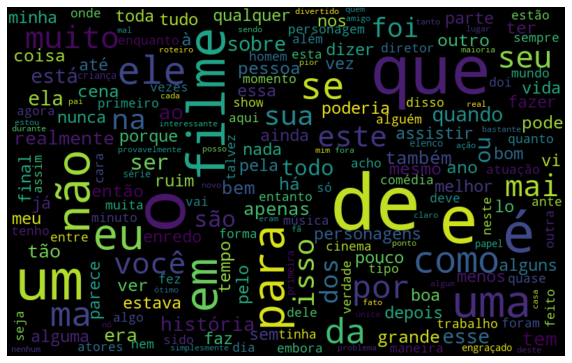

In [67]:
plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
#imdb.query("sentiment == 'pos'")

In [78]:
def nuvem_neg(texto,col):
    texto_neg = texto.query("sentiment == 'neg'")
    palavras = ''.join([texto for texto in texto_neg[col]])
    
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                               max_font_size=110,
                               collocations=False).generate(palavras)
    
    plt.figure(figsize=(10,8))
    plt.title("Nuvem palavras negativas")
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [80]:
def nuvem_pos(texto,col):
    texto_pos = texto.query("sentiment == 'pos'")
    palavras = ''.join([texto for texto in texto_pos[col]])
    
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                               max_font_size=110,
                               collocations=False).generate(palavras)
    
    plt.figure(figsize=(10,8))
    plt.title("Nuvem palavras positivas")
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

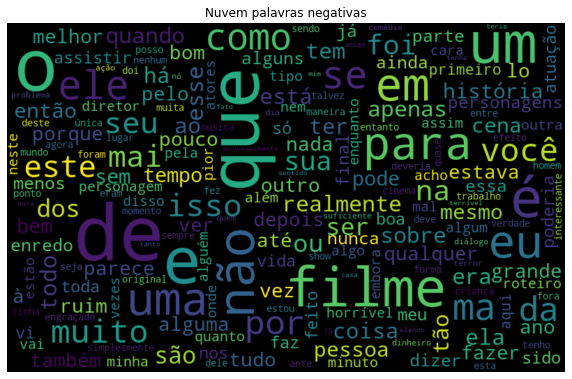

In [79]:
nuvem_neg(imdb,'text_pt')

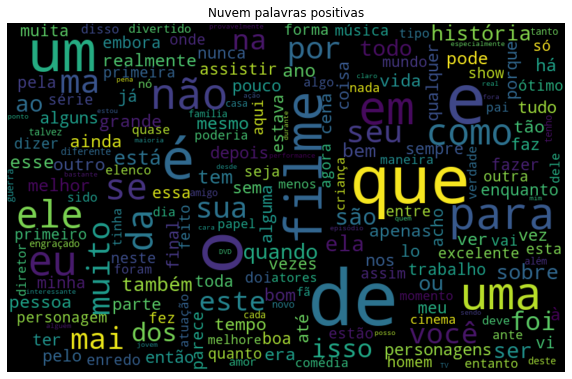

In [81]:
nuvem_pos(imdb,'text_pt')

## Calcular frequencia de palavras

In [114]:
def pareto(texto, col, qtd):
    
    palavras = ''.join([texto for texto in texto[col]])
    
    token = tokenize.WhitespaceTokenizer().tokenize(palavras)
    freq = nltk.FreqDist(token)
    
    df_freq = pd.DataFrame({"palavra": list(freq.keys()),
                        "frequencia":list(freq.values())})

    nlargest = df_freq.nlargest(columns = "frequencia",n=qtd)

    plt.figure(figsize=(12,8))
    sns.barplot(data=nlargest,x="palavra",y="frequencia", color = "green")
    plt.show()

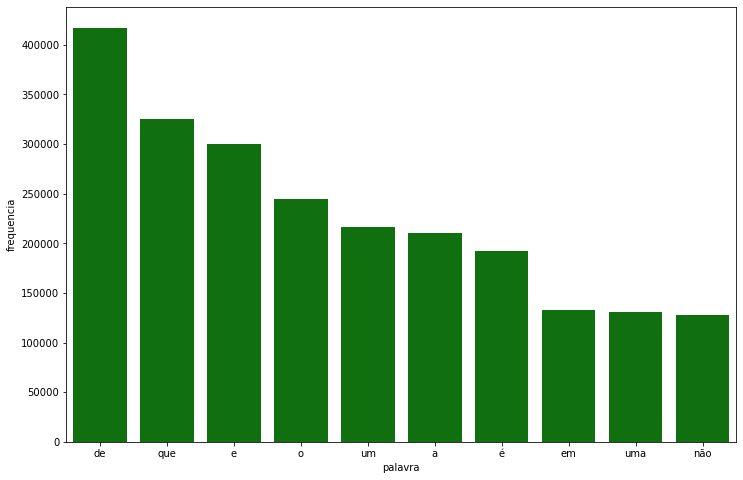

In [115]:
pareto(imdb, 'text_pt',10)

## Tratamento de palavras

### Tratamento 1 - Removendo espaços em branco

In [122]:
def novas_frases(imdb):
    # palavras irrelevantes
    stopwords = nltk.corpus.stopwords.words("portuguese")
    
    frase_processada = list()
    for critica in imdb['text_pt']:
        nova_frase = list()
        palavras_texto = tokenize.WhitespaceTokenizer().tokenize(critica)
        for palavra in palavras_texto:
            if palavra not in stopwords:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    imdb['resenha_trat1'] = frase_processada
    
    return imdb
    

In [123]:
imdb = novas_frases(imdb)

In [124]:
imdb.head()

,id,text_en,text_pt,sentiment,classe,resenha_trat1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [125]:
classificar_texto(imdb,'resenha_trat1','classe')

0.6640517589971694

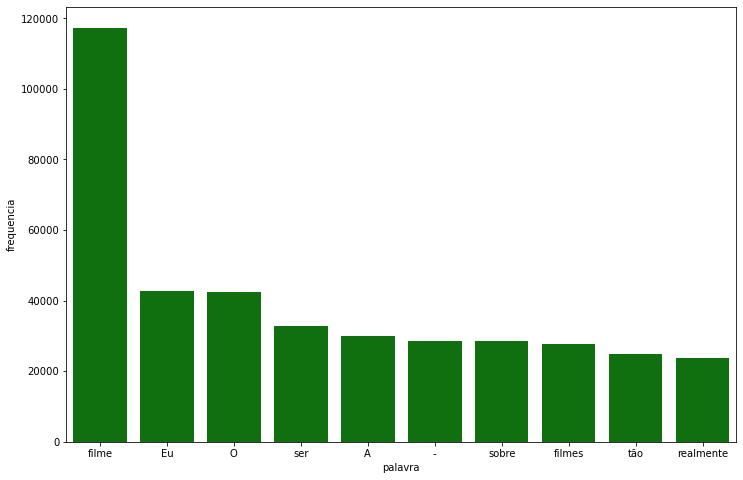

In [126]:
pareto(imdb,'resenha_trat1',10)

### Tratamento 2 - Removendo Pontuação das palavras

In [150]:
from string import punctuation
import unidecode

In [146]:
#token_espaco = tokenize.WhitespaceTokenizer()
#token_pontuacao = tokenize.WordPunctTokenizer()

def remove_pontuacao(texto, col):
    stopwords = nltk.corpus.stopwords.words("portuguese")

    pontuacao = list()
    for ponto in punctuation:
        pontuacao.append(ponto)

    pontuacao_stopwords = pontuacao + stopwords
    frase_processada = list()

    for critica in texto[col]:
        nova_frase = list()
        palavras_texto = tokenize.WordPunctTokenizer().tokenize(critica) # Mudar para WordPunctTokenizer
        for palavra in palavras_texto:
            if palavra not in pontuacao_stopwords:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    texto['resenha_trat2'] = frase_processada
    return texto   

In [147]:
imdb = remove_pontuacao(imdb,'resenha_trat1')

In [148]:
imdb.head()

,id,text_en,text_pt,sentiment,classe,resenha_trat1,resenha_trat2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


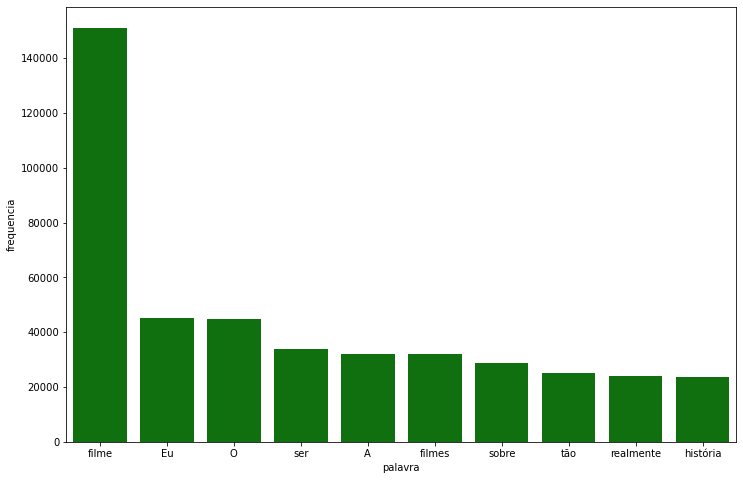

In [149]:
pareto(imdb, "resenha_trat2",10)

### Tratamento 3 - Removendo Acentuação das palavras

In [196]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + stopwords
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [162]:
def remove_acentuacao(texto,col):
    
    pontuacao = list()
    for ponto in punctuation:
        pontuacao.append(ponto)

    pontuacao_stopwords = pontuacao + stopwords
    stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
    sem_acentos = [unidecode.unidecode(texto) for texto in texto[col]]
    
    texto['resenha_trat3'] = sem_acentos
    frase_processada = list()

    for critica in texto['resenha_trat3']:
        nova_frase = list()
        palavras_texto = tokenize.WordPunctTokenizer().tokenize(critica) # Mudar para WordPunctTokenizer
        for palavra in palavras_texto:
            if palavra not in pontuacao_stopwords:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    texto['resenha_trat3'] = frase_processada
    
    
    return texto
    

In [163]:
imdb = remove_acentuacao(imdb,'resenha_trat2')

In [164]:
imdb.head()

,id,text_en,text_pt,sentiment,classe,resenha_trat1,resenha_trat2,resenha_trat3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [174]:
acc_trat3 = classificar_texto(imdb,'resenha_trat3','classe')

In [175]:
print(acc_trat3)

0.6608976951071573


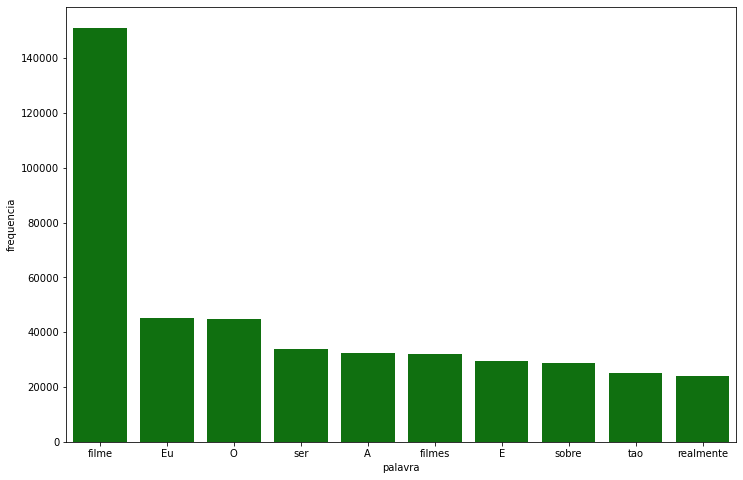

In [178]:
pareto(imdb, "resenha_trat3",10)

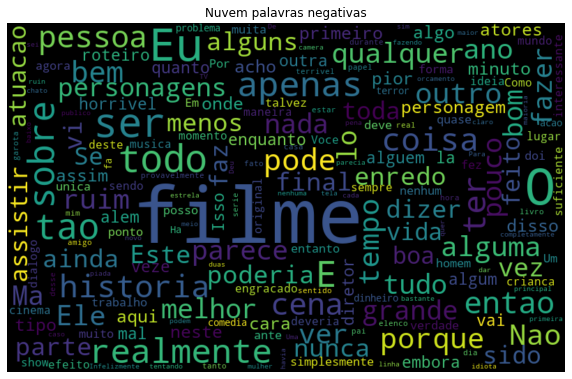

In [180]:
nuvem_neg(imdb, 'resenha_trat3')

### Tratamento 4 - Letras maiusculas

In [183]:
def letra_minuscula(texto, col):
    
    pontuacao = list()
    for ponto in punctuation:
        pontuacao.append(ponto)

    pontuacao_stopwords = pontuacao + stopwords
    stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
    
    frase_processada = list()
    for critica in texto[col]:
        nova_frase = list()
        critica = critica.lower()
        palavras_texto = tokenize.WordPunctTokenizer().tokenize(critica) # Mudar para WordPunctTokenizer
        for palavra in palavras_texto:
            if palavra not in stopwords_sem_acentos:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    texto['resenha_trat4'] = frase_processada
    return texto
    

In [185]:
imdb = letra_minuscula(imdb, 'resenha_trat3')

In [186]:
imdb.head()

,id,text_en,text_pt,sentiment,classe,resenha_trat1,resenha_trat2,resenha_trat3,resenha_trat4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [187]:
acc_trat4 = classificar_texto(imdb,'resenha_trat4','classe')
print(acc_trat4)

0.6879094217549535


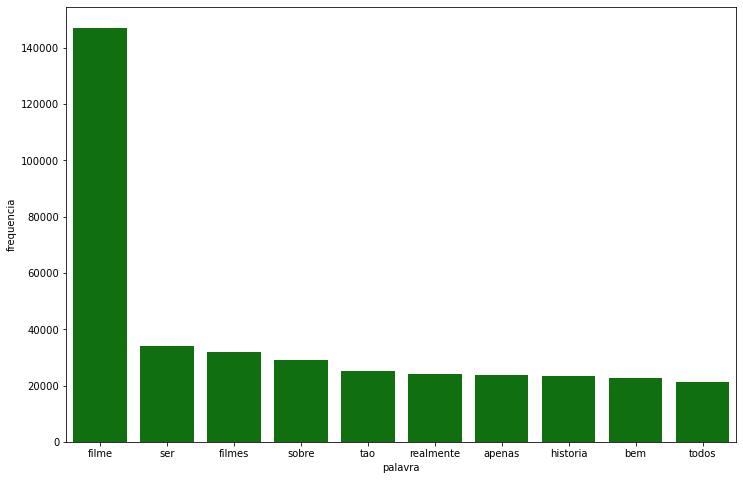

In [188]:
pareto(imdb, "resenha_trat4",10)

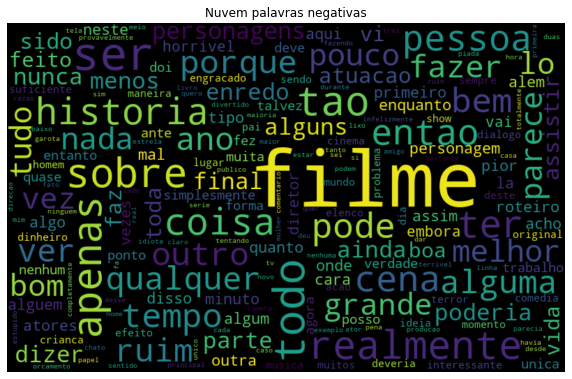

In [189]:
nuvem_neg(imdb, 'resenha_trat4')

### Tratamento 5 -  Removedor de Sufixo (RSLPStemmer)

Stemming é a técnica que transforma as flexões de uma palavra em um núcleo comum (tronco), por exemplo (Correr, Corredor) -> (Corr, Corr). Essa técnica normaliza as palavras de forma a evitar suas flexões e derivações. Existem diversos algoritmos para realizar a “stemmização”, seja em Português, sejam em outros idiomas.

In [195]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor"), stemmer.stem("correria"), stemmer.stem("corrida")

('corr', 'corr', 'corr')

In [197]:
def stemizar(texto, col,stopwords_sem_acentos):
    
    stemmer = nltk.RSLPStemmer()
    
    frase_processada = list()
    for critica in texto[col]:
        nova_frase = list()
        palavras_texto = tokenize.WordPunctTokenizer().tokenize(critica) # Mudar para WordPunctTokenizer
        for palavra in palavras_texto:
            if palavra not in stopwords_sem_acentos:
                nova_frase.append(stemmer.stem(palavra))
        frase_processada.append(' '.join(nova_frase))
    texto['resenha_trat5'] = frase_processada
    return texto
    

In [198]:
imdb = stemizar(imdb, 'resenha_trat4',stopwords_sem_acentos)

In [199]:
imdb.head()

,id,text_en,text_pt,sentiment,classe,resenha_trat1,resenha_trat2,resenha_trat3,resenha_trat4,resenha_trat5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


In [200]:
acc_trat5 = classificar_texto(imdb,'resenha_trat5','classe')
print(acc_trat5)

0.6943792964011323


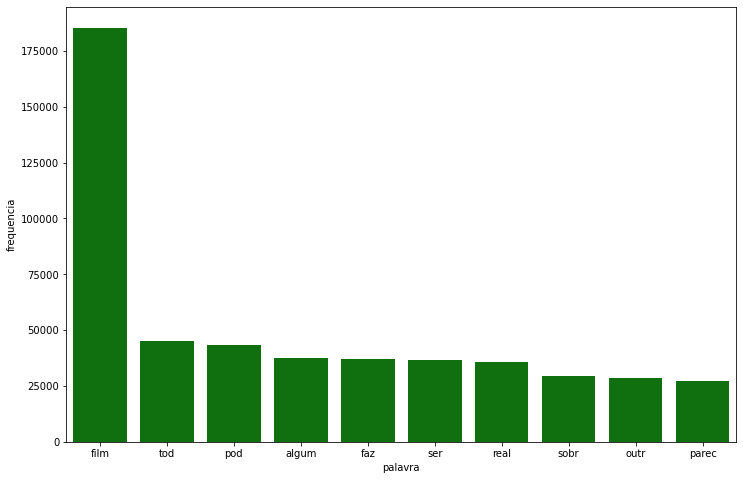

In [201]:
pareto(imdb, "resenha_trat5",10)

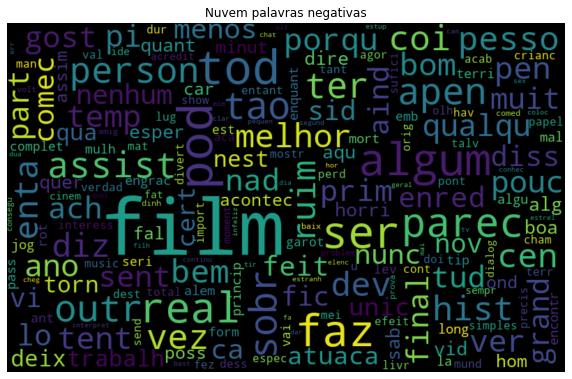

In [202]:
nuvem_neg(imdb, 'resenha_trat5')

## TF-IDF

Frequência dos Termos - Inverso da Frequência do Documento

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [204]:
frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names()

)

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [217]:
def classificar_texto_tfidf(texto, col, classe):
    
    tfidf = TfidfVectorizer(lowercase=False, max_features=50)
    tfidf_bruto = tfidf.fit_transform(texto[col])
    
    X_train, X_test, y_train, y_test = train_test_split(tfidf_bruto,
                                                    texto[classe],
                                                    random_state=42)
    
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    
    return lr.score(X_test, y_test)

In [206]:
acc_tfidf = classificar_texto_tfidf(imdb,'text_pt','classe')
print(acc_tfidf)

0.6600889607763849


In [207]:
acc_tfidf = classificar_texto_tfidf(imdb,'resenha_trat5','classe')
print(acc_tfidf)

0.6988273352203801


## Ngrams

Criar uma sequencia e memoria de palavras. A principal característica do TF-IDF é ser uma pontuação proporcional à frequência da palavra no texto e equilibrada pela frequência no corpus, ou seja, palavras que se repetem muito em todo o corpus tendem a ter pontuações menores. Embora o Ngrams seja um método que pode otimizar o seu resultado devemos ter cuidado, já que ao utilizá-lo o nosso vetor Bag of Words aumenta consideravelmente de tamanho, o que também faz com que o custo computacional aumente.

In [208]:
from nltk import ngrams

In [214]:
from nltk import ngrams

frase= "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [222]:
def pesos(lr, tfidf):
    pesos = pd.DataFrame(
                        lr.coef_[0].T,
                        index = tfidf.get_feature_names())
    print(pesos.nlargest(10, 0))
    print(pesos.nsmallest(10, 0))

In [223]:
def classificar_texto_ngram(texto, col, classe):
    tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
    #tfidf = TfidfVectorizer(lowercase=False) # Sem Ngrams
    vetor_tfidf = tfidf.fit_transform(texto[col])

    X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf,
                                                    texto[classe],
                                                    random_state=42)

    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    
    acc = lr.score(X_test, y_test)
    print("Acc :",acc)
    
    pesos(lr, tfidf)
    
    return acc


In [224]:
acc_ngram = classificar_texto_ngram(imdb,'resenha_trat5','classe')

0.8858875859280226
                 0
otim      9.883148
excel     8.998212
perfeit   6.909051
maravilh  6.277557
favorit   5.888959
incri     5.746389
divert    5.411610
brilh     4.856989
ador      4.570598
hoj       4.491365
                0
ruim   -11.761766
pi     -11.424122
horri   -9.701481
terri   -8.386112
nad     -7.610627
chat    -7.508107
parec   -6.628180
nenhum  -6.369930
tent    -5.774706
mal     -5.710310
